In [1]:
import pandas as pd
from flask import Flask, request
import matplotlib.pyplot as plt

In [2]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [3]:
con = psycopg2.connect(host='localhost', user='postgres', password='postgres')
con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cursor = con.cursor()
name_database = "banco"
sql_create_database = "CREATE DATABASE {}".format(name_database)
try:
    cursor.execute(sql_create_database)
except:
    print("database 'banco' already exists")
    

database 'banco' already exists


In [4]:
con = psycopg2.connect(host='localhost',database='banco',user='postgres',password='postgres')
cur = con.cursor()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 17:52:34] "GET /dispersao/3000&5000 HTTP/1.1" 200 -


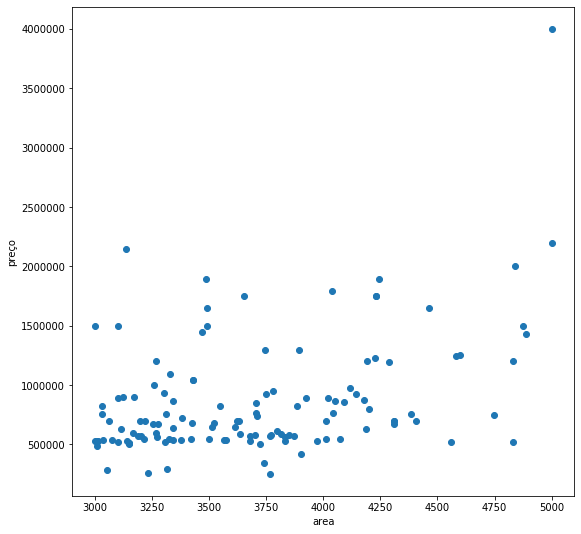

In [5]:
app = Flask(__name__)

@app.route("/dispersao/<min>&<max>", methods = ['GET']) #no get não precisa colocar o methods
def selecionar_area(min,max):
    query = "SELECT * FROM info_casas WHERE area>={min} and area<={max}".format(min=min,max=max)
    try:
        df = pd.read_sql(query, con)
        fig,axs = plt.subplots(1,1,figsize = (9,9))
        axs.scatter(df.area,df.preco)
        plt.xlabel('area')
        plt.ylabel('preço')
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela pessoas.", 500
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 17:54:10] "GET /preco HTTP/1.1" 200 -


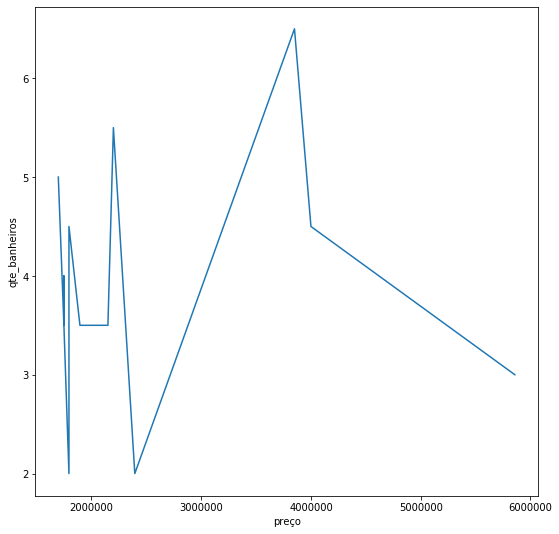

In [6]:
app = Flask(__name__)

@app.route("/preco", methods = ['GET']) #no get não precisa colocar o methods
def top_15():
    query = "SELECT * FROM info_casas ORDER BY preco DESC LIMIT 15;"
    try:
        df = pd.read_sql(query, con)
        fig,axs = plt.subplots(1,1,figsize = (9,9))
        axs.plot(df.preco,df.qte_banheiros)
        plt.xlabel('preço')
        plt.ylabel('qte_banheiros')
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela pessoas.", 500
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 18:38:46] "GET /banheiro/4 HTTP/1.1" 200 -


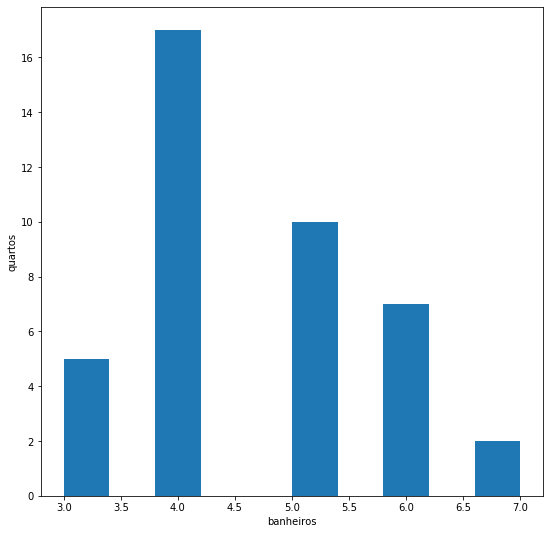

In [5]:
app = Flask(__name__)

@app.route("/banheiro/<qtd>", methods = ['GET']) #no get não precisa colocar o methods
def top_15(qtd):
    query = "SELECT * FROM info_casas WHERE qte_banheiros = {qtd}".format(qtd=qtd)
    try:
        df = pd.read_sql(query, con)
        fig,axs = plt.subplots(1,1,figsize = (9,9))
        axs.hist(df.qte_quartos)
        plt.xlabel('banheiros')
        plt.ylabel('quartos')
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela info_casas.", 500
app.run()

In [9]:
app = Flask(__name__)

@app.route("/atualizar", methods=['PUT'])
def atualizar():
    post_args = request.json
    if "cep" not in post_args:
        return "O cep não foi informado no dado recebido.", 400
    
    if "qte_quartos" in post_args:
        query = "UPDATE info_casas SET qte_quartos = '{qte_quartos}' WHERE cep = '{cep}'".format(qte_quartos=post_args["qte_quartos"], cep=post_args["cep"])
        cur.execute(query)
    if "qte_banheiros" in post_args:
        query = "UPDATE info_casas SET qte_banheiros = '{qte_banheiros}' WHERE cep = '{cep}'".format(qte_banheiros=post_args["qte_banheiros"], cep =post_args["qte_banheiros"])
        cur.execute(query)
    if "area" in post_args:
        query = "UPDATE info_casas SET area = '{area}' WHERE cep = '{cep}'".format(area=post_args["area"], cep=post_args["cep"])
        cur.execute(query)
    if "preco" in post_args:
        query = "UPDATE info_casas SET preco = '{preco}' WHERE cep = '{cep}'".format(preco=post_args["preco"], cep=post_args["cep"])
        cur.execute(query)
    con.commit()
    return "Imovel atualizado com sucesso!", 200
app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 17:59:37] "PUT /atualizar HTTP/1.1" 200 -


In [10]:
app = Flask(__name__)

@app.route("/deletar_endereco", methods=['DELETE'])
def deletar_imovel():
    post_args = request.json
    if "cep" not in post_args:
        return "O cep não foi informado no dado recebido.", 400
    
    query = "DELETE FROM info_casas WHERE cep = {cep};".format(cep=post_args["cep"])
    cur.execute(query)
    con.commit()
    return "Imovel deletada com sucesso!", 200

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 18:00:41] "DELETE /deletar_endereco HTTP/1.1" 200 -
